In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

#Loading the train and test datasets
train_data = pd.read_csv("D:/Task/Dataset/train - train.csv")
test_data = pd.read_csv("D:/Task/Dataset/test - test.csv")

In [2]:
# Utility function to plot learning curves
def plot_learning_curve(model, X_train, y_train, title):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    plt.plot(train_sizes, val_mean, label='Validation Accuracy', color='orange')
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='orange')
    plt.title(title)
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Utility function to evaluate and visualize models
def evaluate_model(model, X_train, y_train, X_val, y_val, model_name):

    # Accuracy
    training_accuracy = model.score(X_train, y_train)
    validation_accuracy = model.score(X_val, y_val)

    print(f"{model_name} Training Accuracy: {training_accuracy:.2f}")
    print(f"{model_name} Validation Accuracy: {validation_accuracy:.2f}")
    
    y_val_pred = model.predict(X_val)
    
    # Classification Report
    print(f"\nClassification Report ({model_name} - Validation Data):\n", classification_report(y_val, y_val_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_val, y_val_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix ({model_name})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Learning Curve
    plot_learning_curve(model, X_train, y_train, f'Learning Curve - {model_name}')

# Prepare training and validation data (Ensure X_train, y_train, X_val, y_val are defined


In [3]:
#displaying the first 5 rows of each dataset
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [4]:
test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [5]:
##Checking for null values , data types and descriptive statistics for the train data set

In [6]:
train_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

As Shown Above we found missing values for the Following columns in the train Dataset:
1. fc - Front Camera megapixels
2. four_g - Has 4G or not
3. int_memory - Internal Memory in Gigabytes
4. m_dep - Mobile Depth in cm
5. mobile_wt - Weight of mobile phone
6. n_cores - Number of cores of the processor
7. pc - Primary Camera megapixels
8. px_height - Pixel Resolution Height
9. px_width - Pixel Resolution Width
10. ram - Random Access Memory in Megabytes
11. sc_h - Screen Height of mobile in cm
12. sc_w - Screen Width of mobile in cm

In [7]:
train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Checking for Datatypes type, as shown below all datatypes seem to be numerical 

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

**We need to check for class Imbalances, Luckily this Dataset is equally distributed acrossed all price ranges**



Class Distribution (%):
 1    25.0
2    25.0
3    25.0
0    25.0
Name: price_range, dtype: float64


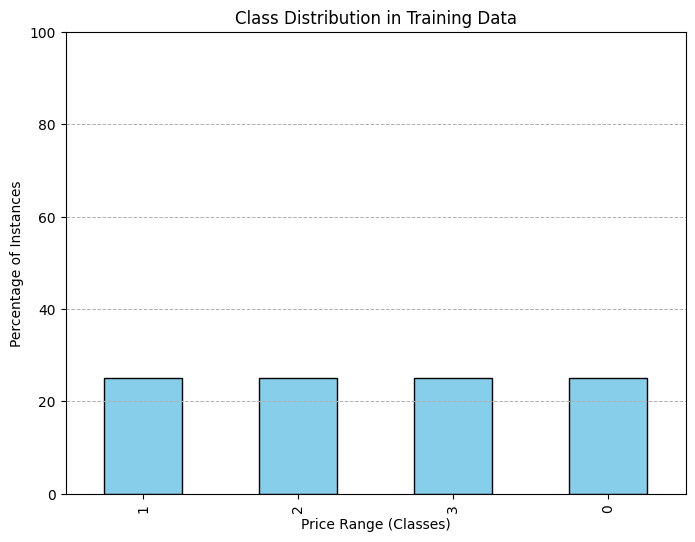

In [9]:
# Check for class distribution percentages
class_counts = train_data['price_range'].value_counts(normalize=True) * 100  # Convert to percentages

# Display class distribution
print("Class Distribution (%):\n", class_counts)

# Plot the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Class Distribution in Training Data')
plt.xlabel('Price Range (Classes)')
plt.ylabel('Percentage of Instances')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()


In [10]:
Numerical_columns = list(train_data.columns[train_data.isnull().sum() > 0])

In [11]:
categorical_columns = ['four_g', 'n_cores']

These are the Numerical columns with missing values

In [12]:
Numerical_columns.remove('four_g')
Numerical_columns.remove('n_cores')
Numerical_columns

['fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w']

To Understand and Decide which method of replacing NaN values should be done for Numerical values:
Mean/Median

We look at the Skewness of the data, if:
Skewness < 1  ----> We Use Mean
Skewness > 1 ----> We use Median



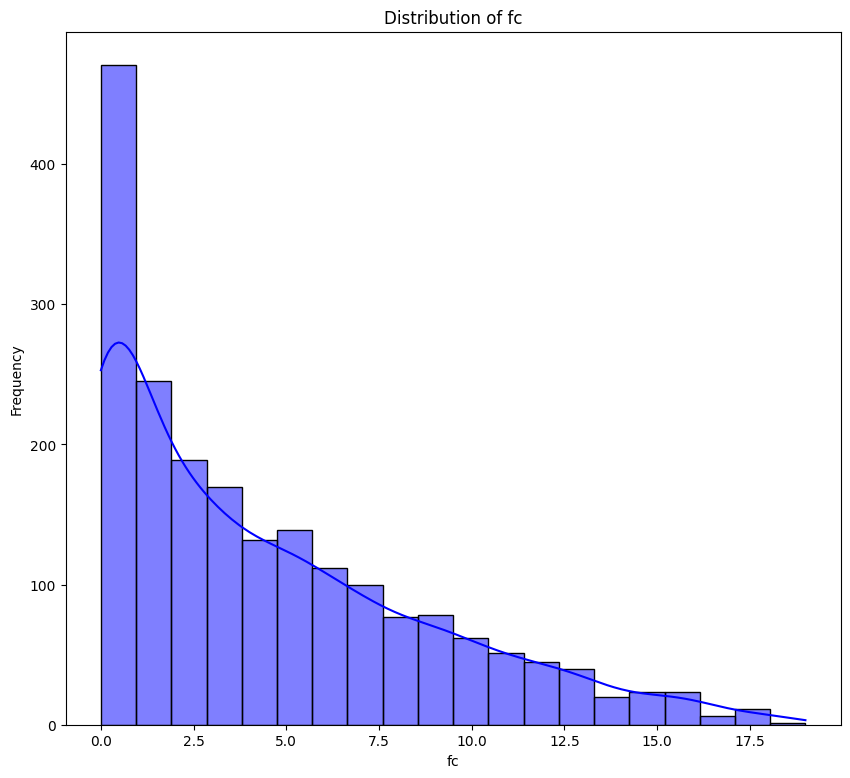

Skewness of fc: 1.0174942707011045


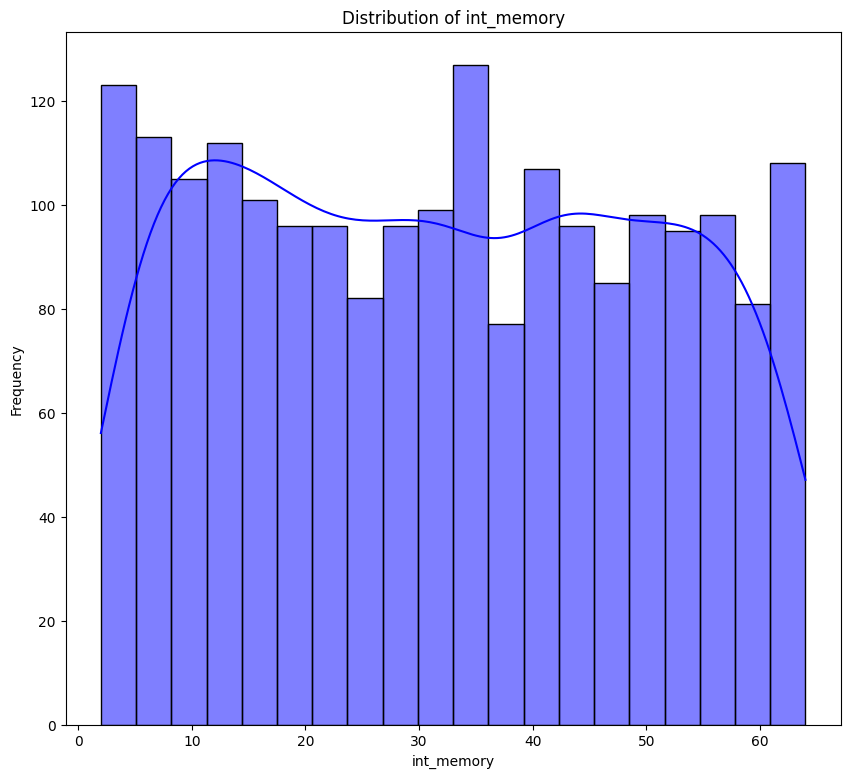

Skewness of int_memory: 0.05723118724239866


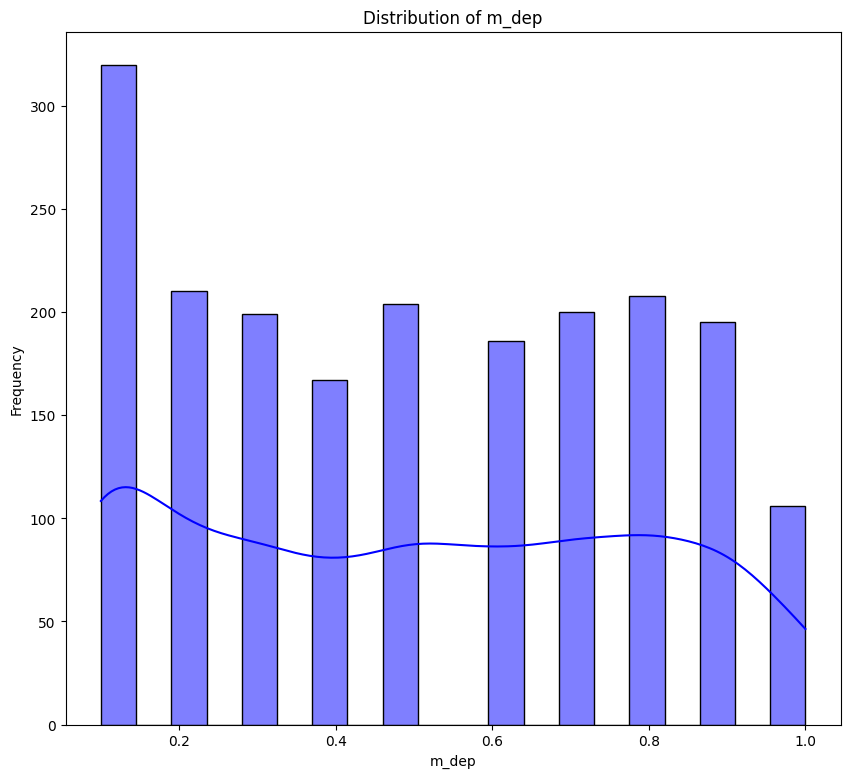

Skewness of m_dep: 0.08568119609249265


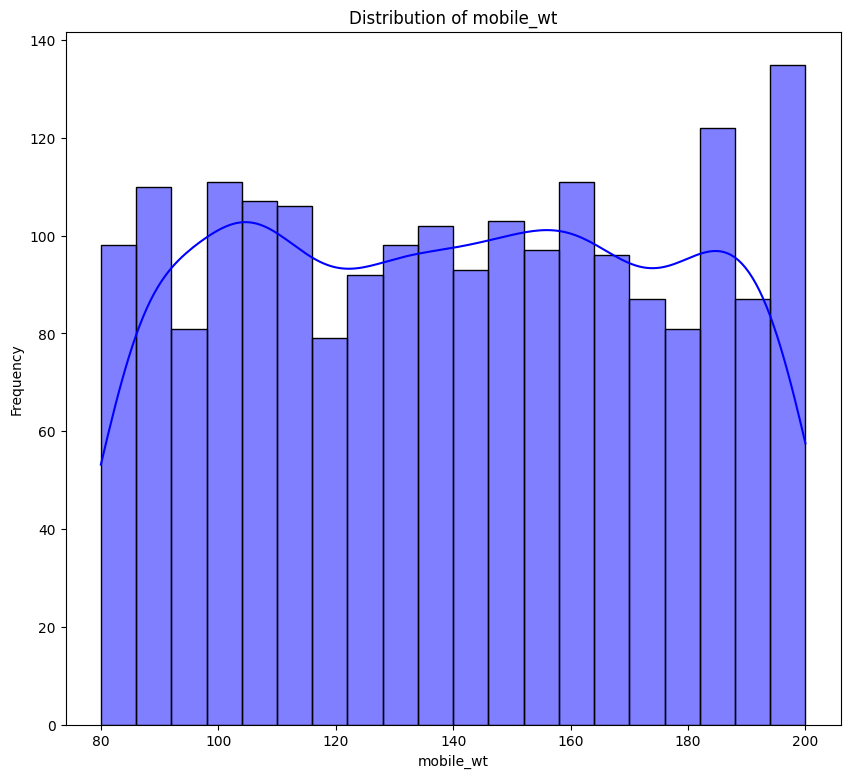

Skewness of mobile_wt: 0.00488027930389034


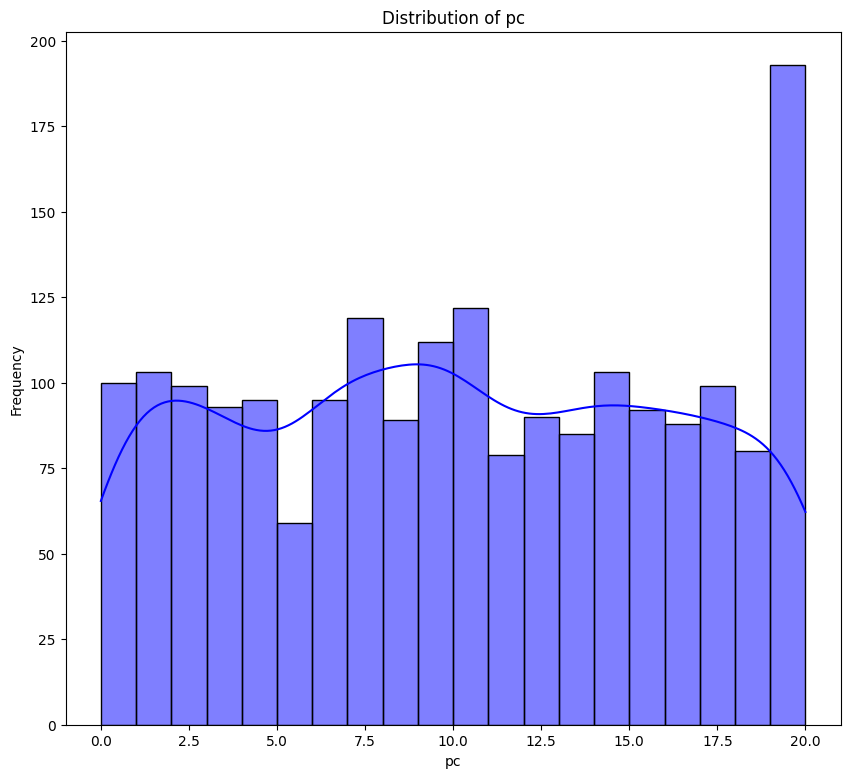

Skewness of pc: 0.019015250195173052


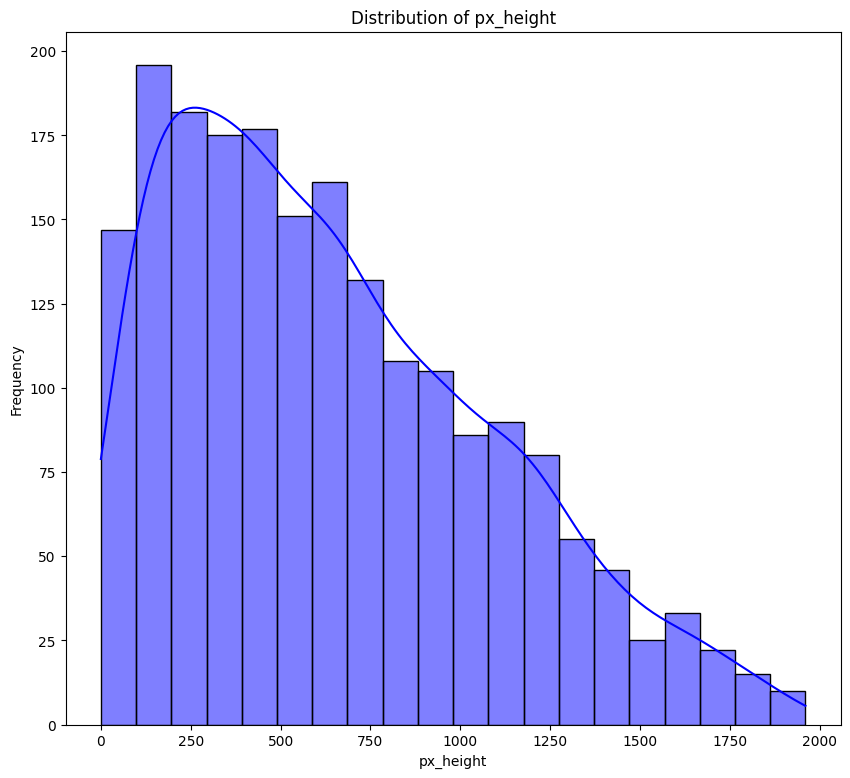

Skewness of px_height: 0.6632064643627963


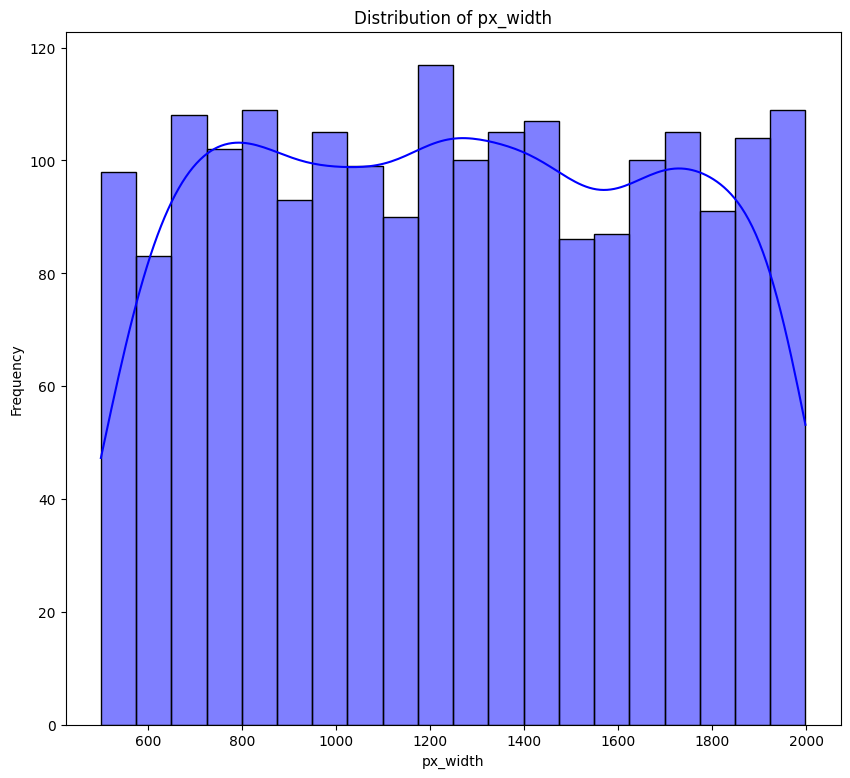

Skewness of px_width: 0.01620097862891447


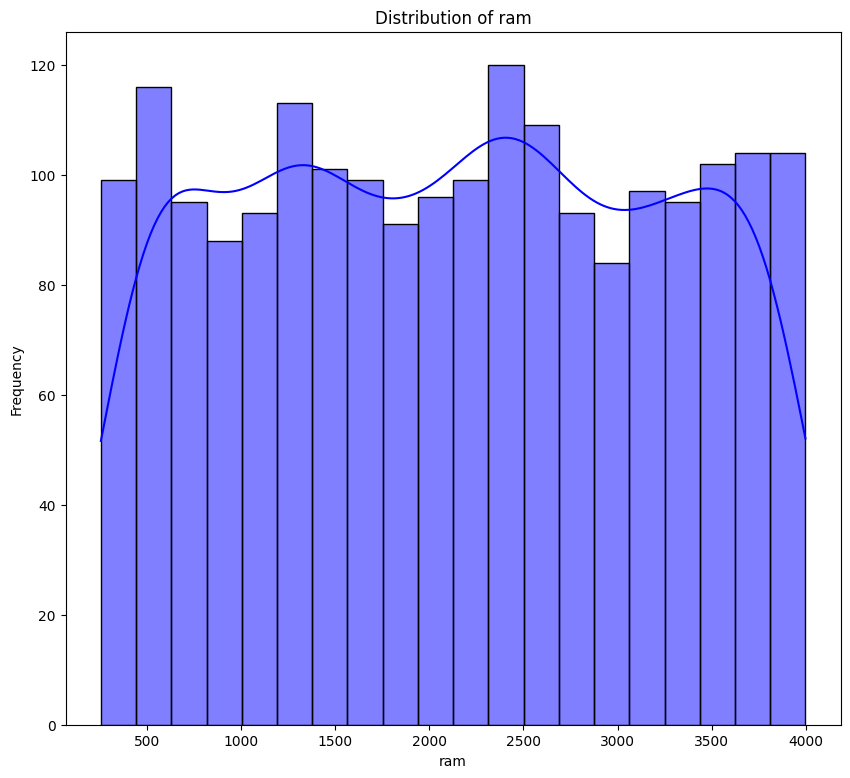

Skewness of ram: 0.006488689350428412


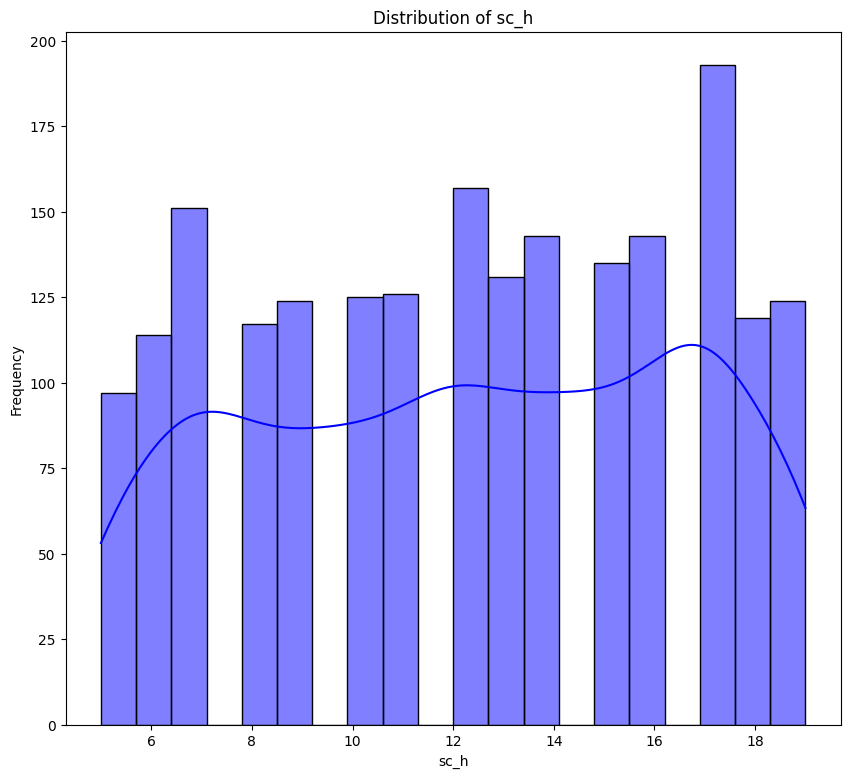

Skewness of sc_h: -0.09820185116675459


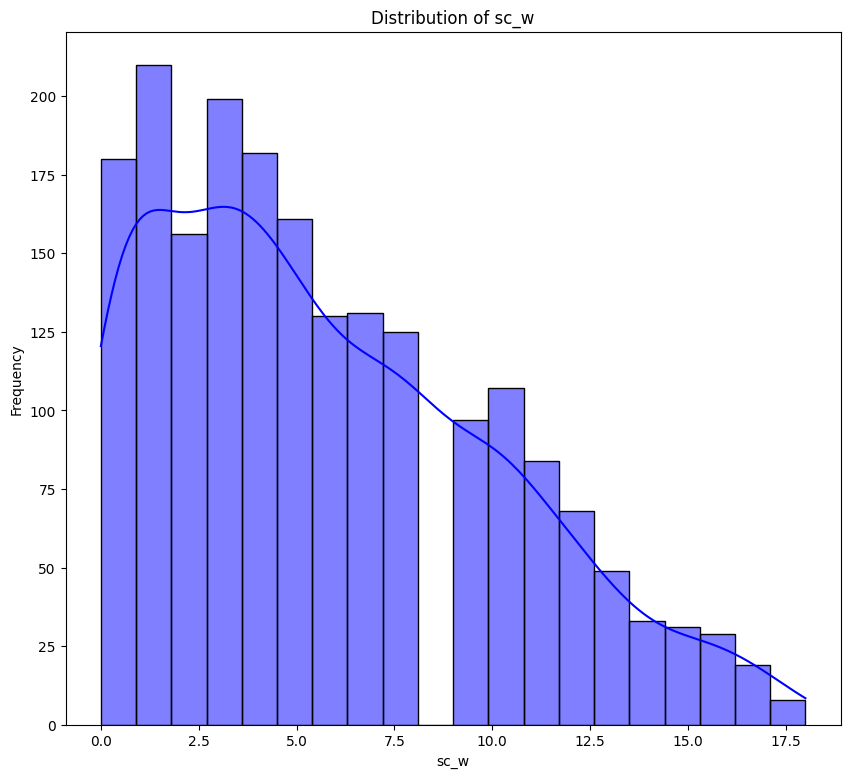

Skewness of sc_w: 0.6340806901710085


In [13]:
for col in Numerical_columns:
    plt.figure(figsize=(10, 9))
    sns.histplot(train_data[col], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Measure skewness
    skewness = train_data[col].skew()
    print(f"Skewness of {col}: {skewness}")

Based on the previous Plots and results we will use mean imputation for the column 'front camera' and median for the rest of the Numerical values. We will use mode imputation for columns = ['four_g', 'n_cores'] as they are closer to being categorical columns

In [14]:
median_cols = Numerical_columns
median_cols.remove("fc")
median_cols

['int_memory',
 'm_dep',
 'mobile_wt',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w']

Imputing each column with a missing value with its corresponding method of imputation 

In [15]:
from sklearn.impute import SimpleImputer
Median_imputer = SimpleImputer(strategy='median')
train_data[median_cols] = Median_imputer.fit_transform(train_data[median_cols])

train_data[median_cols].isnull().sum()

int_memory    0
m_dep         0
mobile_wt     0
pc            0
px_height     0
px_width      0
ram           0
sc_h          0
sc_w          0
dtype: int64

In [16]:
Mean_imputer = SimpleImputer(strategy='mean')
train_data[['fc']] = Mean_imputer.fit_transform(train_data[['fc']])

train_data[['fc']].isnull().sum()

fc    0
dtype: int64

In [17]:
categorical_imputer = SimpleImputer(strategy='most_frequent')
train_data[categorical_columns] = categorical_imputer.fit_transform(train_data[categorical_columns])

In [18]:
train_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Doing the same for the test data set

In [19]:
test_data.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [20]:
##Luckily for the test data set there aren't any missing values

In [21]:
test_data.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [22]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [23]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [24]:
ids = test_data['id']
test_data = test_data.drop(columns = ['id'])

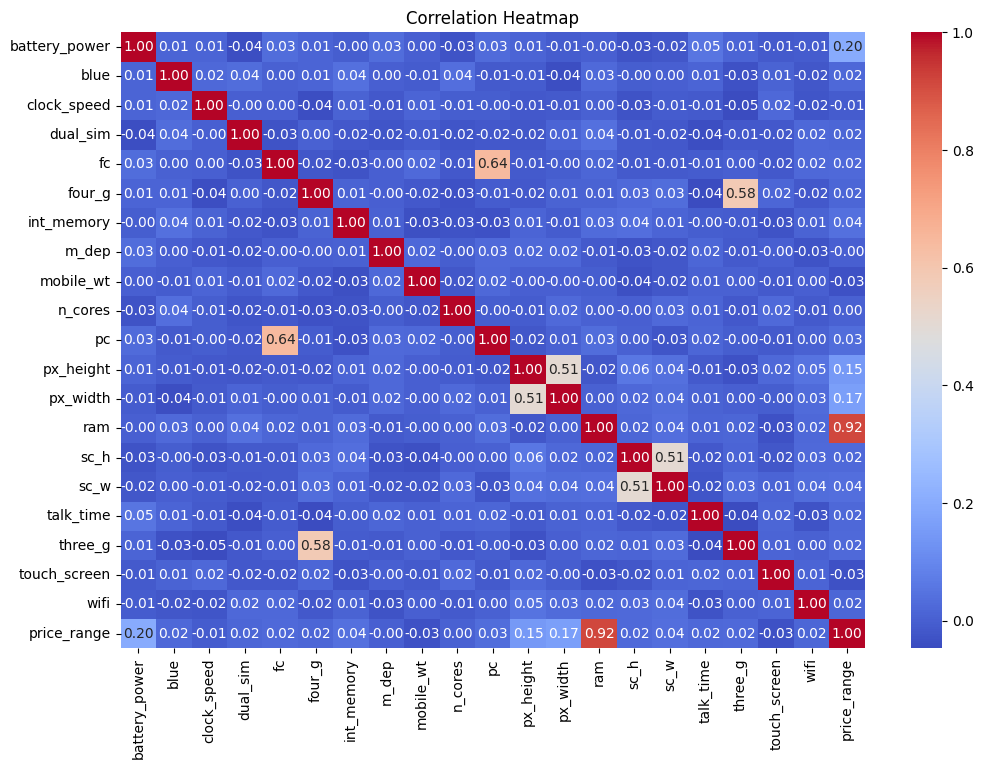

In [25]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Based on the heatmap the columns with the strongest correlation with the price range is "RAM".
Screen width and height are correlated to each other the same way as well as the pixel heigh and pixel width are.

Which then can be combined into a single feature respectively like screen are and screen resolution. A process of feature Engineering to reduce dimensionality.

In [26]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Select numerical features to scale
numerical_features = ['battery_power', 'clock_speed', 'int_memory', 'm_dep', 
                      'mobile_wt', 'ram', 'px_height',  'px_width', 'sc_h' , 'sc_w']

# Apply scaling to the train and test datasets
train_data[numerical_features] = scaler.fit_transform(train_data[numerical_features])
test_data[numerical_features] = scaler.transform(test_data[numerical_features])


train_data[numerical_features].head()


,battery_power,clock_speed,int_memory,m_dep,mobile_wt,ram,px_height,px_width,sc_h,sc_w
0,-0.902597,0.830779,-1.382398,0.339295,1.350634,0.391637,-1.410272,-1.146414,-0.784629,0.283336
1,-0.495139,-1.253064,1.156340,0.686401,-0.120768,0.467251,0.588302,1.705250,1.115486,-0.635095
2,-1.537686,-1.253064,0.494061,1.380611,0.133898,0.441431,1.396766,1.075662,-0.309600,-0.864703
3,-1.419319,1.198517,-1.216828,1.033506,-0.262249,0.594503,1.290627,1.237688,0.877972,0.512944
4,1.325906,-0.395011,0.659630,0.339295,0.020713,-0.657734,1.272560,-0.090928,-1.022143,-0.864703


In [27]:
test_data[numerical_features].head()

,battery_power,clock_speed,int_memory,m_dep,mobile_wt,ram,px_height,px_width,sc_h,sc_w
0,-0.445060,0.340463,-1.492778,-1.396231,1.492115,1.246441,-0.945067,0.372004,-0.072086,0.283336
1,-0.904874,-1.253064,1.597860,1.033506,1.435523,1.632809,0.229237,-0.912633,-1.497172,-1.323918
2,1.294038,1.566254,-0.278599,1.380611,1.294042,0.250553,1.412573,0.265530,1.115486,0.972159
3,0.699922,-1.253064,-0.388979,-0.007810,-1.252616,1.630964,-0.789246,1.158989,-0.547114,-1.323918
4,0.444976,-0.149853,0.935580,-0.007810,-0.913062,-0.323927,0.236011,-1.021422,0.640457,0.512944


In [28]:
train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2.000000e+03,2000.0000,2.000000e+03,2000.000000,2000.000000,2000.000000,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000,...,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2.149392e-16,0.4950,-1.545430e-16,0.509500,4.310276,0.522500,-9.237056e-17,6.750156e-17,-2.131628e-17,4.517000,...,7.993606e-18,-9.769963e-18,4.618528e-17,5.329071e-17,-1.909584e-17,11.011000,0.761500,0.503000,0.507000,1.500000
std,1.000250e+00,0.5001,1.000250e+00,0.500035,4.330340,0.499618,1.000250e+00,1.000250e+00,1.000250e+00,2.286772,...,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,5.463955,0.426273,0.500116,0.500076,1.118314
min,-1.678817e+00,0.0000,-1.253064e+00,0.000000,0.000000,0.000000,-1.658348e+00,-1.396231e+00,-1.705355e+00,1.000000,...,-1.455438e+00,-1.738967e+00,-1.722781e+00,-1.734686e+00,-1.323918e+00,2.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.804033e-01,0.0000,-1.007906e+00,0.000000,1.000000,0.000000,-8.856886e-01,-1.049125e+00,-8.847656e-01,3.000000,...,-8.169101e-01,-8.715477e-01,-8.453848e-01,-7.846287e-01,-8.647026e-01,6.000000,1.000000,0.000000,0.000000,0.750000
50%,-2.849593e-02,0.0000,-2.727384e-02,1.000000,3.000000,1.000000,-2.649118e-03,-7.809867e-03,2.071282e-02,4.000000,...,-1.817698e-01,-9.914854e-03,2.140652e-02,-7.208561e-02,-1.758795e-01,11.000000,1.000000,1.000000,1.000000,1.500000
75%,8.575560e-01,1.0000,8.307794e-01,1.000000,7.000000,1.000000,8.803903e-01,1.033506e+00,8.413027e-01,7.000000,...,6.814564e-01,8.835446e-01,8.669892e-01,8.779718e-01,7.425513e-01,16.000000,1.000000,1.000000,1.000000,2.250000
max,1.728812e+00,1.0000,1.811412e+00,1.000000,19.000000,1.000000,1.763430e+00,1.727716e+00,1.690189e+00,8.000000,...,2.970784e+00,1.728396e+00,1.727787e+00,1.590515e+00,2.809021e+00,20.000000,1.000000,1.000000,1.000000,3.000000


In [29]:
test_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,0.022744,0.516000,0.022861,0.517000,4.593000,0.487000,0.088525,0.052934,-0.021420,4.328000,10.054000,-0.039225,-0.026641,0.013567,-0.073273,-0.103323,11.085000,0.756000,0.50000,0.507000
std,0.984407,0.499994,1.016508,0.499961,4.463325,0.500081,1.000522,0.974881,0.986166,2.288155,6.095099,0.977675,1.017690,1.003350,1.026206,0.973551,5.497636,0.429708,0.50025,0.500201
min,-1.681094,0.000000,-1.253064,0.000000,0.000000,0.000000,-1.658348,-1.396231,-1.705355,1.000000,0.000000,-1.455438,-1.736653,-1.716326,-1.734686,-1.323918,2.000000,0.000000,0.00000,0.000000
25%,-0.781953,0.000000,-1.007906,0.000000,1.000000,0.000000,-0.775309,-0.702020,-0.863543,2.000000,5.000000,-0.859817,-0.971078,-0.817952,-1.022143,-0.864703,6.750000,1.000000,0.00000,0.000000
50%,0.018168,1.000000,-0.027274,1.000000,3.000000,0.000000,0.135326,-0.007810,-0.035880,4.000000,10.000000,-0.180641,-0.002971,0.026939,-0.072086,-0.175879,11.000000,1.000000,0.50000,1.000000
75%,0.889424,1.000000,0.953358,1.000000,7.000000,1.000000,0.935580,1.033506,0.841303,6.000000,16.000000,0.583786,0.894539,0.867911,0.877972,0.512944,16.000000,1.000000,1.00000,1.000000
max,1.731088,1.000000,1.811412,1.000000,19.000000,1.000000,1.763430,1.727716,1.690189,8.000000,20.000000,2.851096,1.728396,1.719488,1.590515,2.809021,20.000000,1.000000,1.00000,1.000000


In [30]:
X = train_data.drop(columns='price_range')  # All columns except the target column
y = train_data['price_range']  # Target column
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

**After splitting our data into training and validation, we will start the model training with several classification Models, monitoring its confusion matrix performance, learning curves and accuracies.**

Random Forest Training Accuracy: 1.00
Random Forest Validation Accuracy: 0.88

Classification Report (Random Forest - Validation Data):
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.86      0.84      0.85        91
           2       0.78      0.84      0.81        92
           3       0.93      0.88      0.91       112

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



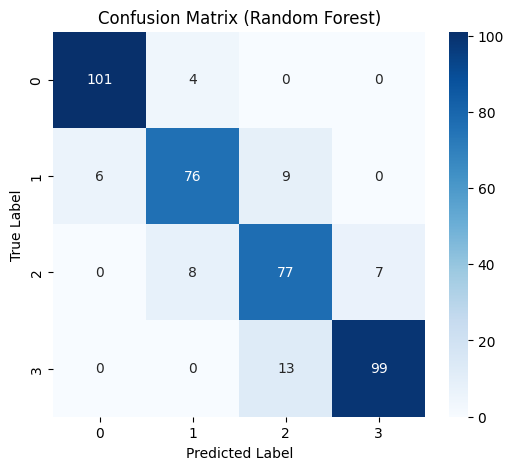

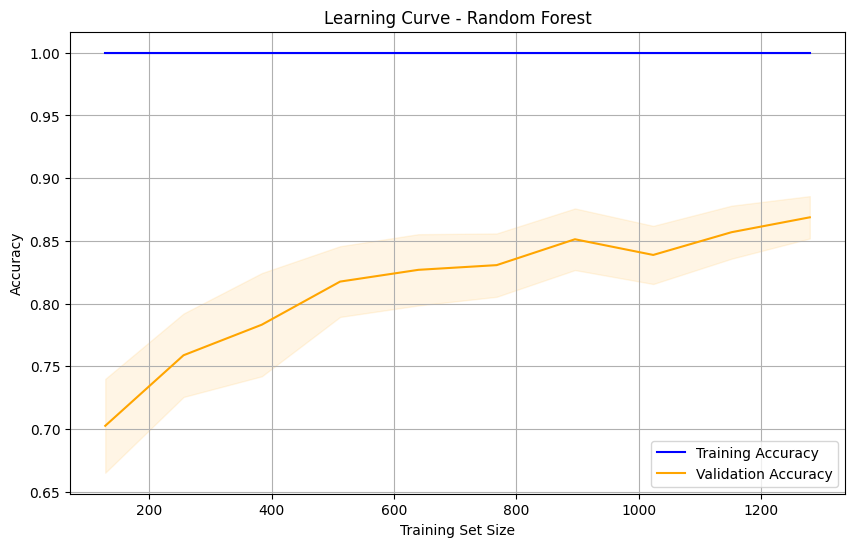

In [31]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
evaluate_model(rf_model, X_train, y_train, X_val, y_val, "Random Forest")

SVM Training Accuracy: 0.98
SVM Validation Accuracy: 0.97

Classification Report (SVM - Validation Data):
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       105
           1       0.91      1.00      0.95        91
           2       1.00      0.95      0.97        92
           3       0.98      1.00      0.99       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



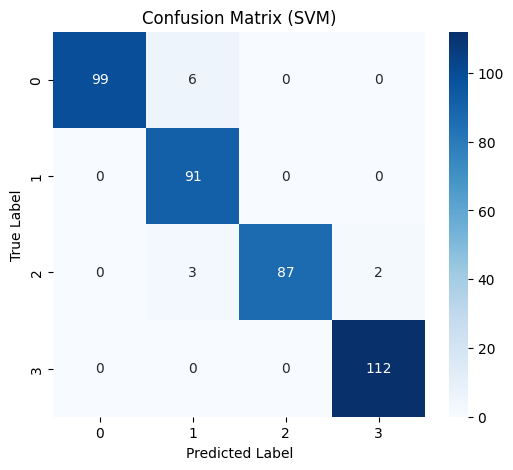

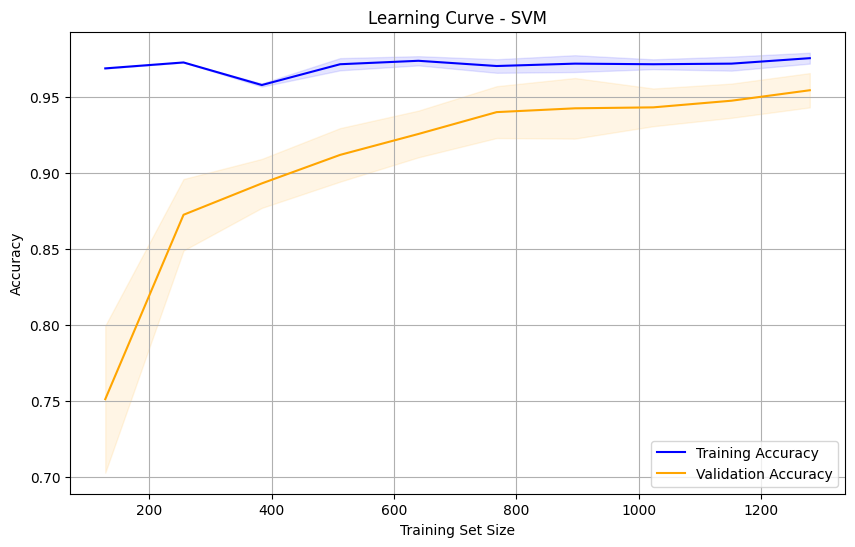

In [32]:
# SVM
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
evaluate_model(svm_model, X_train, y_train, X_val, y_val, "SVM")


**SPOILERT ALERT**
**I chose the SVM Model to save. The dataset contains multiple features (21 in total), and SVM is well-suited for handling high-dimensional feature spaces as well as it's robustness againt overfittting**

In [33]:
import joblib

joblib.dump(svm_model, 'Svm_Model.pkl')

print("SVM model saved as 'svm_model.pkl'")

SVM model saved as 'svm_model.pkl'


Decision Tree Training Accuracy: 1.00
Decision Tree Validation Accuracy: 0.83

Classification Report (Decision Tree - Validation Data):
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       105
           1       0.74      0.84      0.78        91
           2       0.82      0.67      0.74        92
           3       0.87      0.92      0.89       112

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



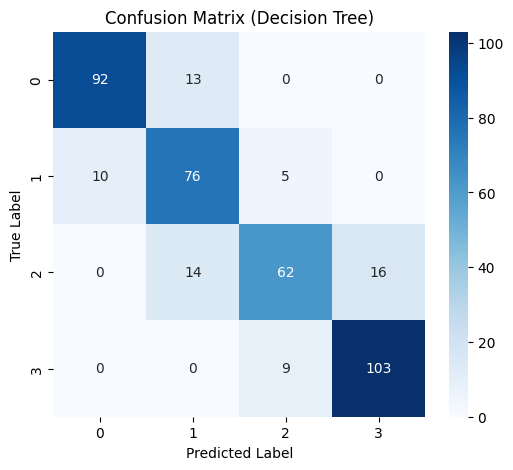

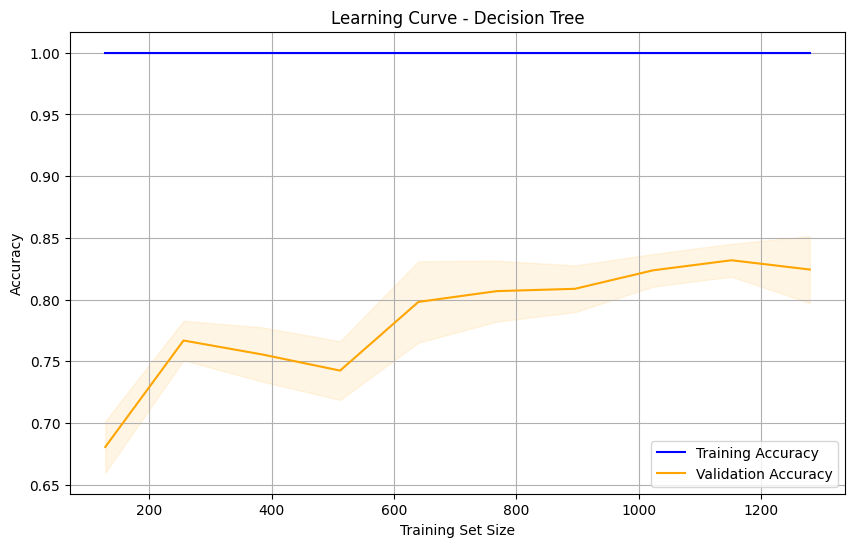

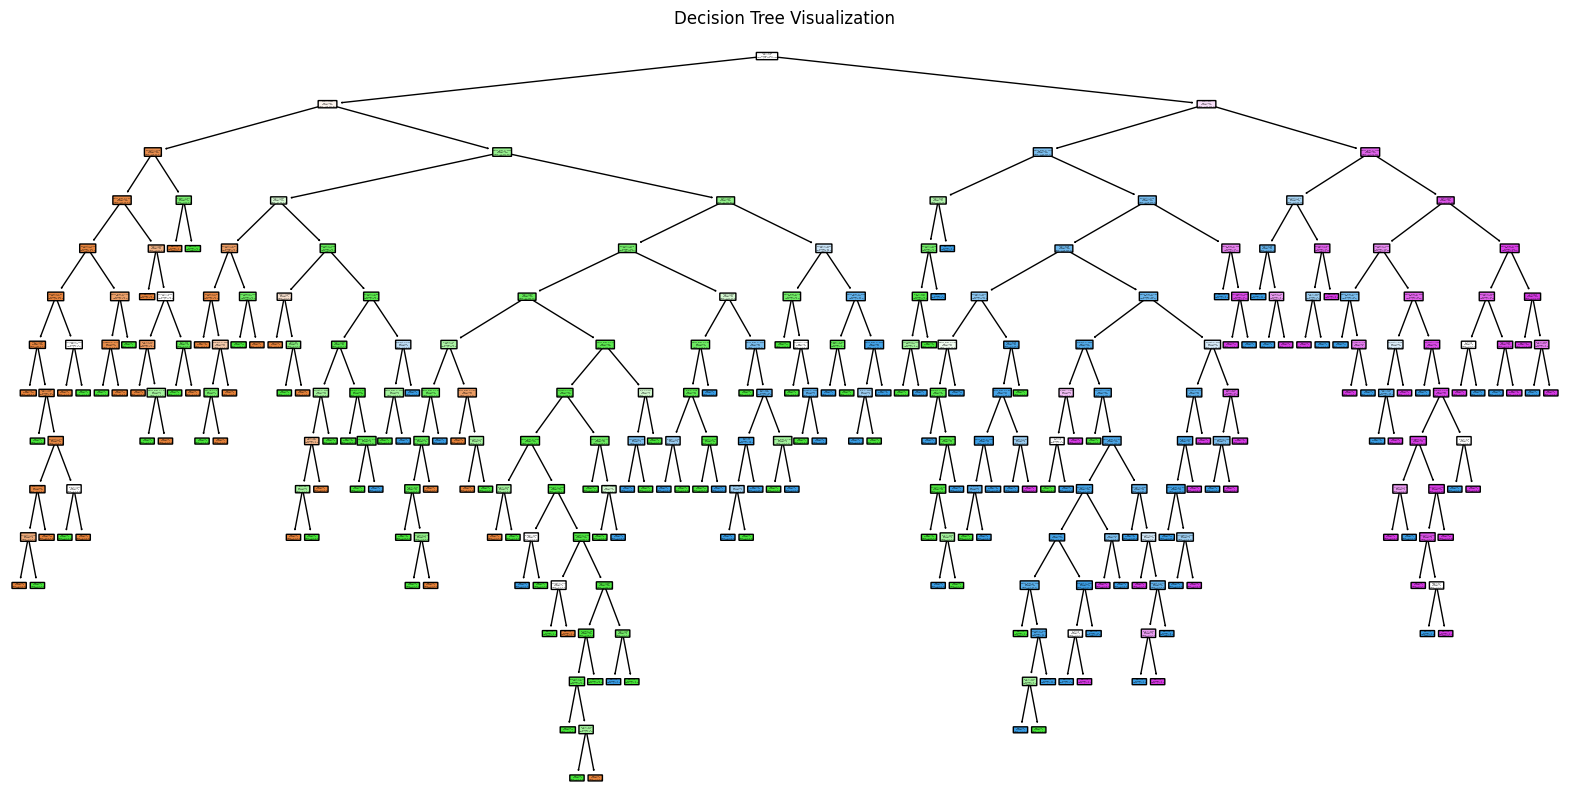

In [34]:
# Decision Tree
dt_model = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_model.fit(X_train , y_train)
evaluate_model(dt_model, X_train, y_train, X_val, y_val, "Decision Tree")
# Visualize the Decision Tree
class_names = [str(cls) for cls in dt_model.classes_]
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X_train.columns, class_names=class_names, filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()


Extreme Gradient Boost Training Accuracy: 1.00
Extreme Gradient Boost Validation Accuracy: 0.89

Classification Report (Extreme Gradient Boost - Validation Data):
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       105
           1       0.84      0.92      0.88        91
           2       0.83      0.82      0.82        92
           3       0.93      0.88      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



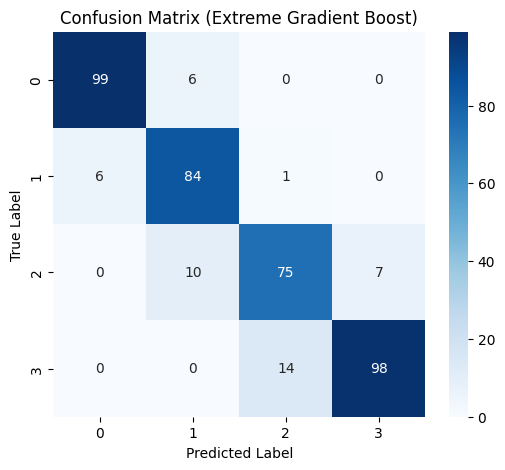

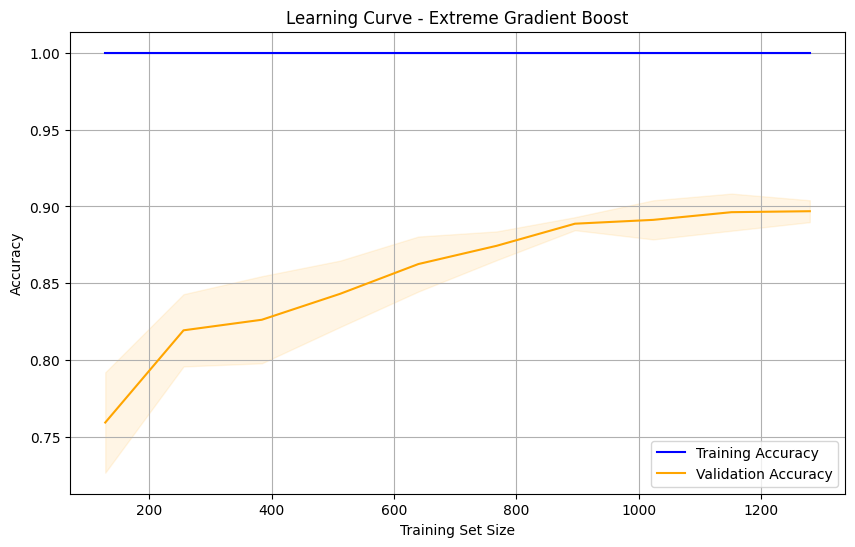

In [35]:
# XGBoost
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train , y_train)
evaluate_model(xgb_model, X_train, y_train, X_val, y_val, "Extreme Gradient Boost")

Logistic Regression Training Accuracy: 0.98
Logistic Regression Validation Accuracy: 0.98

Classification Report (Logistic Regression - Validation Data):
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       105
           1       0.95      1.00      0.97        91
           2       0.99      0.93      0.96        92
           3       0.97      0.99      0.98       112

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



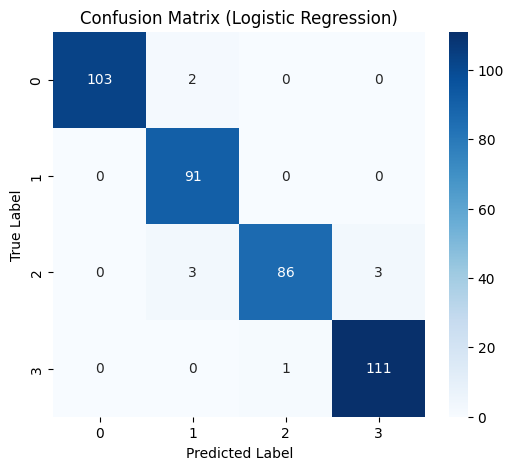

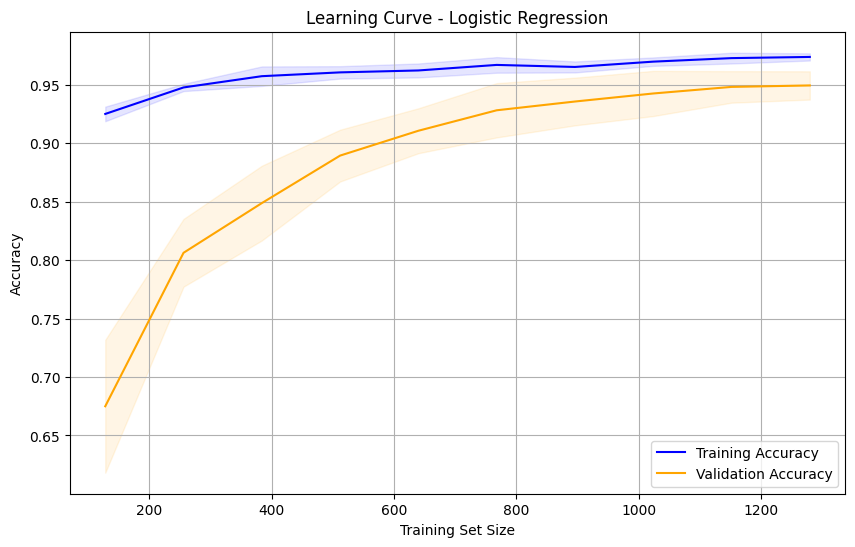

In [36]:
# Logistic Regression
logreg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
logreg_model.fit(X_train , y_train)
evaluate_model(logreg_model, X_train, y_train, X_val, y_val, "Logistic Regression")

**Fine tuning the logisitic Regression Model to see if there is any room for improvement**

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define hyperparameter grid
lr_param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l2"],  # Add 'l1' or 'elasticnet' if your solver supports them
    "solver": ["lbfgs", "saga"],  # 'lbfgs' works for 'l2'; 'saga' supports 'elasticnet'
    "max_iter": [100, 500, 1000]  # Number of iterations for convergence
}

# Initialize model
lr_model = LogisticRegression()

# GridSearchCV
lr_grid_search = GridSearchCV(
    estimator=lr_model,
    param_grid=lr_param_grid,
    scoring="accuracy",
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
lr_grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters for Logistic Regression:", lr_grid_search.best_params_)
print("Best Training Accuracy:", lr_grid_search.best_score_)

# Evaluate on validation set
best_lr_model = lr_grid_search.best_estimator_
lr_val_accuracy = best_lr_model.score(X_val, y_val)
print("Validation Accuracy (Logistic Regression):", lr_val_accuracy)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters for Logistic Regression: {'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Training Accuracy: 0.9650000000000001
Validation Accuracy (Logistic Regression): 0.9775


C:\Users\alida\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**As Well as the SVM model to see if there is any room for improvement to distinguish between these two models that scored the highest.**

In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
svm_param_grid = {
    "C": [0.1, 1, 10, 100],
    "kernel": ["linear", "rbf"],
    "gamma": [0.001, 0.01, 0.1, 1],  
}

# Initialize model
svm_model = SVC()

# GridSearchCV
svm_grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=svm_param_grid,
    scoring="accuracy",
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
svm_grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters for SVM:", svm_grid_search.best_params_)
print("Best Training Accuracy:", svm_grid_search.best_score_)

# Evaluate on validation set
best_svm_model = svm_grid_search.best_estimator_
svm_val_accuracy = best_svm_model.score(X_val, y_val)
print("Validation Accuracy (SVM):", svm_val_accuracy)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters for SVM: {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}
Best Training Accuracy: 0.9600000000000002
Validation Accuracy (SVM): 0.9775


In [39]:
# Load the fine-tuned SVM model
loaded_svm_model = joblib.load('Svm_Model.pkl')

print("Loaded SVM model successfully!")


Loaded SVM model successfully!


In [40]:
# Make predictions on the test set
test_predictions = loaded_svm_model.predict(test_data)
ram_values = test_data['ram']  # Extract the RAM column
# Display the predictions
output = pd.DataFrame({
    'id': ids,
    'RAM': ram_values,  # RAM values from the test dataset,
    'price_range': test_predictions
}
    
)
output.to_csv('SVM_test_predictions.csv', index=False)
print("Predictions saved to 'SVM_test_predictions.csv'")

Predictions saved to 'SVM_test_predictions.csv'


**This is just for reviewing the prediction on the test dataset , as we know from the correleation heat matrix there is a strong relationship and influence between the amount of RAM (MB) and the price Range. This Scatter Plot proves it**

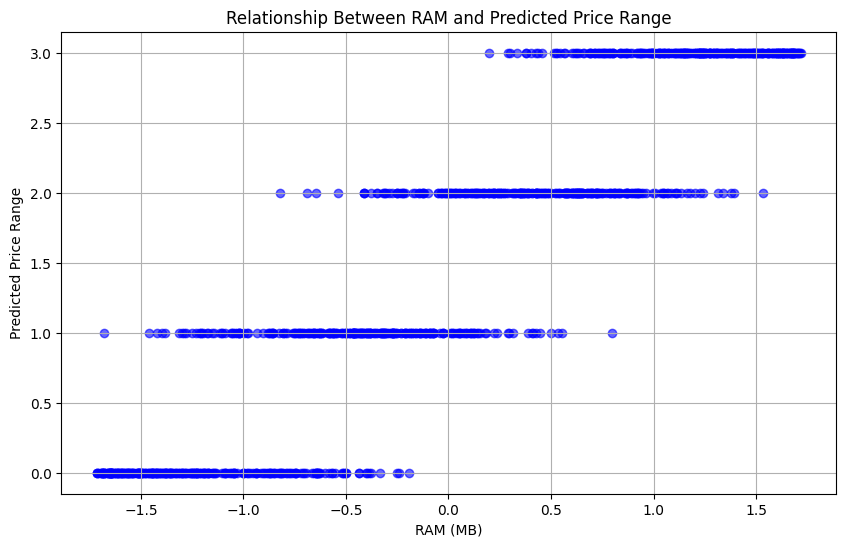

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(output['RAM'], output['price_range'], alpha=0.6, color='blue')
plt.title('Relationship Between RAM and Predicted Price Range')
plt.xlabel('RAM (MB)')
plt.ylabel('Predicted Price Range')
plt.grid()
plt.show()